## NavierStokes_Landau

Por Sandra Arce Mena y Angela María Cubillos Garay

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

## 0.1 Over-relaxation

In [46]:
Min = 0.
Max = 40.
N = 51

In [47]:
x = np.linspace(Min, Max, N)
y = x.copy()
h = x[1] - x[0]

In [48]:
def Function_first(y):
    return 100.

def Function_second(y):
    return 50.

def Function_third(x):
    return 10.

def Function_fourth(x):
    return 0.

In [49]:
def InitT():
    
    T = np.zeros((N, N))

    T[0,:] = Function_first(y)
    T[-1,:] = Function_second(y)
    
    T[:,0] = Function_third(x)
    T[:,-1] = Function_fourth(x)
    
    return T

In [50]:
def GetRelaxation(T, w, Nit = int(1e5), tolerance = 0.01):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = w*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
        
        if np.abs(dmax) < tolerance:
            itmax = it
            break
            
    return T,itmax

In [51]:
def Data_generate():
    
    w_s = np.linspace(1,1.9,10)
    its = []
    
    length = len(w_s)
    
    for i in range(length):
        
        T = InitT()
        Tn,it =  GetRelaxation(T,w_s[i])
        
        its.append(it)
        
    return its



In [62]:
iterations = Data_generate()












  0%|          | 0/100000 [00:00<?, ?it/s]










  0%|          | 15/100000 [00:00<12:21, 134.79it/s]










  0%|          | 32/100000 [00:00<12:12, 136.40it/s]










  0%|          | 46/100000 [00:00<12:11, 136.55it/s]










  0%|          | 61/100000 [00:00<12:08, 137.14it/s]










  0%|          | 76/100000 [00:00<11:57, 139.25it/s]










  0%|          | 90/100000 [00:00<12:00, 138.61it/s]










  0%|          | 105/100000 [00:00<11:51, 140.34it/s]










  0%|          | 120/100000 [00:00<11:39, 142.80it/s]










  0%|          | 135/100000 [00:00<11:36, 143.43it/s]










  0%|          | 150/100000 [00:01<11:30, 144.62it/s]










  0%|          | 165/100000 [00:01<11:36, 143.36it/s]










  0%|          | 180/100000 [00:01<11:35, 143.58it/s]










  0%|          | 195/100000 [00:01<11:37, 143.05it/s]










  0%|          | 210/100000 [00:01<13:10, 126.18it/s]










  0%|          | 223/100000 [00:01<14:21, 115.

In [65]:
w_s = np.linspace(1,1.9,10)

<IPython.core.display.Javascript object>


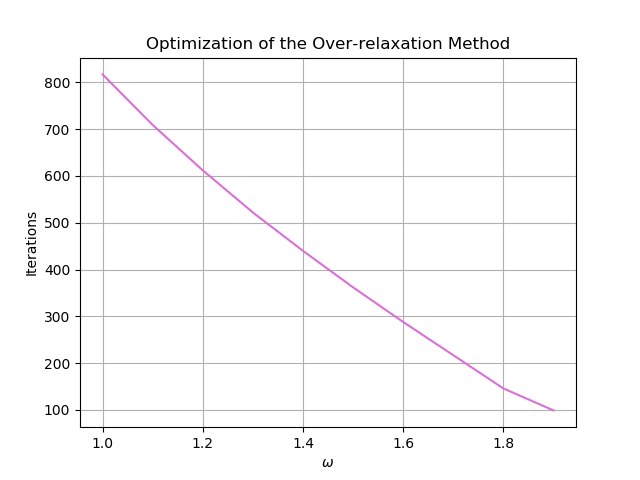

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(w_s, iterations, color= "orchid")
ax.set_title("Optimization of the Over-relaxation Method")
ax.set_xlabel("$\omega$")
ax.set_ylabel("Iterations")
ax.grid(True)

Cuando $\omega$ es mayor o igual a 2, podemos predecir dado el comportamiento de la gráfica una conducta divergente.

## 04. Parámetros de la simulación

In [21]:
velocity_initial = 1
velocity = 0.2
h = 0.02
R = velocity_initial*h/velocity
yMin = 5
yMax = 30
xMin = 5
xMax = 25
N = 51
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

In [22]:
Speed_field = np.zeros((N,N))
Vector_W = np.zeros((N,N))

In [23]:
def Vorticity(Speed_field, Vector_W):

    for i in range(xMin, xMax+1):
        
        Vector_W[i,-1] = -2*(Speed_field[i,-2] - Speed_field[i,-1])/(h**2)
        Vector_W[i,0]= -2*(Speed_field[i,1] - Speed_field[i,0])/(h**2)
        
    for j in range(N-yMax, N-yMin+1):
        
        Vector_W[-1,j] = -2*(Speed_field[-2,j] - Speed_field[-1,j])/(h**2)
        Vector_W[0,j]= -2*(Speed_field[1,j] - Speed_field[0,j])/(h**2)

In [24]:
def Borders(Speed_field, Vector_W):
    
    for i in range(yMin,yMax+1):
        for j in range(xMin,xMax+1):
            
            Speed_field[xMin,j], Speed_field[xMax,j] = 0,0
            Speed_field[i,yMin], Speed_field[i,yMax] = 0,0

In [30]:
def Velocity(Speed_field, Vector_W):

    for i in range(len(x)):
        Speed_field[-1,i] = Speed_field[-2,i] + velocity_initial*h*y[-1] 
        Speed_field[0,i] = Speed_field[1,i]
        Speed_field[i,0] = Speed_field[i,1]
        Speed_field[i,-1] = Speed_field[i,-2]

In [41]:
def Solution(Nit = 10000, w = 0.8, tolerance = 0.00001):
    
    for it in range(Nit):
        
        Velocity(Speed_field, Vector_W)
        Vorticity(Speed_field, Vector_W)
        Borders(Speed_field, Vector_W)
        
        maximum1 = 0
        maximum2 = 0
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                
                if (yMax +1> i > yMin+1) and (xMax +1> j > xMin+1):
                    Speed_field[i,j], Vector_W[i,j] = 0., 0.
                    
                else:
                    U1 = 0.25*(Speed_field[i+1,j]+Speed_field[i-1,j]+Speed_field[i,j+1]+Speed_field[i,j-1] + Vector_W[i,j]*h**2)
                    U = w*(U1 - Speed_field[i,j])
                    Speed_field[i,j]+= U
                    
                    if np.abs(U) > maximum1:
                        maximum1 = U

        for k in range(1,len(x)-1):
            for l in range(1,len(y)-1):
                
                if (xMax +1> k > xMin+1) and (yMax +1> l > yMin+1):
                    Speed_field[k,l], Vector_W[k,l] = 0., 0.
                    
                else:
                    W1 = 0.25*(Vector_W[k,l+1]+Vector_W[k,l-1]+Vector_W[k-1,l]+Vector_W[k+1,l])
                    W2 = -(R/16)*(Speed_field[k,l+1]-Speed_field[k,l-1])*(Vector_W[k+1,l]-Vector_W[k-1,l])
                    W3 = (R/16)*(Vector_W[k,l+1]-Vector_W[k,l-1])*(Speed_field[k+1,l]-Speed_field[k-1,l])
                    
                    W = w*(W1 + W2 + W3 - Vector_W[k,l])
                    Vector_W[k,l] += W
                    
                    if np.abs(W) > maximum2:
                        maximum2 = W
                
        if (np.abs(maximum1) < tolerance) and (np.abs(maximum2) < tolerance):
            break


In [42]:
Solution()

<IPython.core.display.Javascript object>


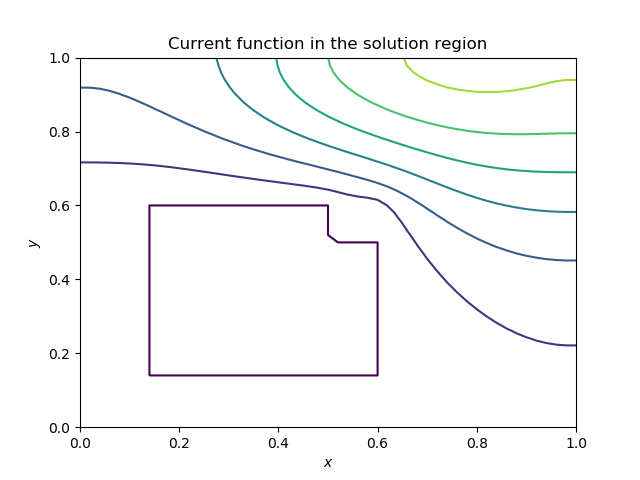

<IPython.core.display.Javascript object>


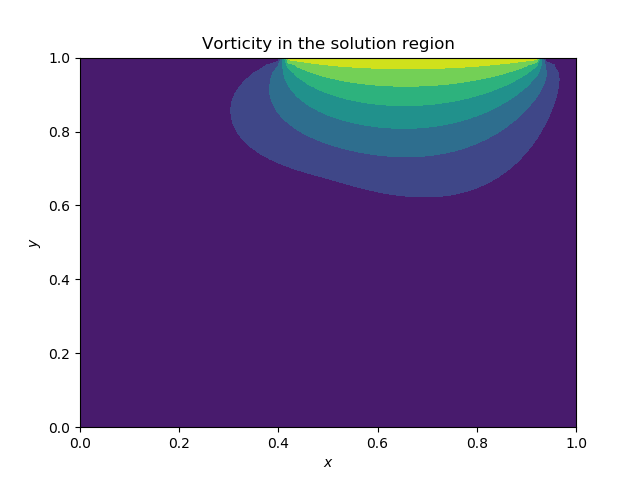

<IPython.core.display.Javascript object>


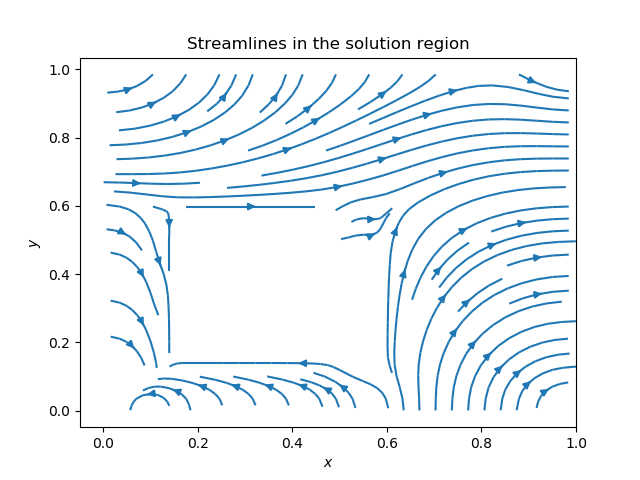

Text(0, 0.5, '$y$')

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_title("Current function in the solution region")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.contour(X,Y,Speed_field)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.set_title("Vorticity in the solution region")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")
ax2.contourf(X,Y,Vector_W)

vx = np.zeros((N,N))
vy = np.zeros((N,N))

for i in range(1,len(x)-1):
    for j in range(1,len(y)-1):
        
        vx[i,j] = (Speed_field[i+1,j]-Speed_field[i-1,j])/(2*h)
        vy[i,j] = (Speed_field[i,j+1]-Speed_field[i,j-1])/(2*h)
        
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.set_title("Streamlines in the solution region")
ax3.streamplot(X,Y,vx,vy)
ax3.set_xlabel("$x$")
ax3.set_ylabel("$y$")